In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

tabela = pd.DataFrame(boston['data'])
tabela.columns = boston.feature_names
tabela.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
keys = [2, 5]
vet = []
for x in range(len(boston['data'])):
    aux = []
    for y in range(len(keys)):
        aux.append(boston['data'][x][keys[y]])
    vet.append(np.array(aux))
    
vet

[array([ 2.31 ,  6.575]),
 array([ 7.07 ,  6.421]),
 array([ 7.07 ,  7.185]),
 array([ 2.18 ,  6.998]),
 array([ 2.18 ,  7.147]),
 array([ 2.18,  6.43]),
 array([ 7.87 ,  6.012]),
 array([ 7.87 ,  6.172]),
 array([ 7.87 ,  5.631]),
 array([ 7.87 ,  6.004]),
 array([ 7.87 ,  6.377]),
 array([ 7.87 ,  6.009]),
 array([ 7.87 ,  5.889]),
 array([ 8.14 ,  5.949]),
 array([ 8.14 ,  6.096]),
 array([ 8.14 ,  5.834]),
 array([ 8.14 ,  5.935]),
 array([ 8.14,  5.99]),
 array([ 8.14 ,  5.456]),
 array([ 8.14 ,  5.727]),
 array([ 8.14,  5.57]),
 array([ 8.14 ,  5.965]),
 array([ 8.14 ,  6.142]),
 array([ 8.14 ,  5.813]),
 array([ 8.14 ,  5.924]),
 array([ 8.14 ,  5.599]),
 array([ 8.14 ,  5.813]),
 array([ 8.14 ,  6.047]),
 array([ 8.14 ,  6.495]),
 array([ 8.14 ,  6.674]),
 array([ 8.14 ,  5.713]),
 array([ 8.14 ,  6.072]),
 array([ 8.14,  5.95]),
 array([ 8.14 ,  5.701]),
 array([ 8.14 ,  6.096]),
 array([ 5.96 ,  5.933]),
 array([ 5.96 ,  5.841]),
 array([ 5.96,  5.85]),
 array([ 5.96 ,  5.966

In [3]:
import math
def DistanciaEuclidiana(vetor1, vetor2, tamanho):
    distancia=0
    for x in range(tamanho):
        distancia += pow((vetor1[x] - vetor2[x]), 2)
    return math.sqrt(distancia)

In [4]:
def Inicializa(k, vet):
    centroides=[]
    for x in range(k):
        centroides.append(vet[x])
    return centroides
    

In [5]:
k=3
centroides = np.array(Inicializa(k, vet))
centroides

array([[ 2.31 ,  6.575],
       [ 7.07 ,  6.421],
       [ 7.07 ,  7.185]])

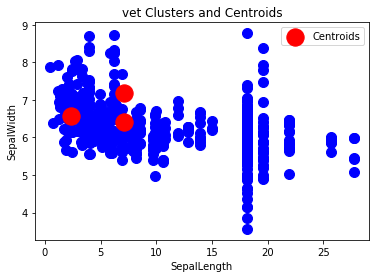

In [6]:
vet = np.array(vet)
import matplotlib.pyplot as plt
plt.scatter(vet[:, 0], vet[:,1], s = 100, c = 'blue')
plt.scatter(centroides[:,0], centroides[:,1], s = 300, c = 'red',label = 'Centroids')
plt.title('vet Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()

In [7]:
def Distancias(vet, centr):
    distancias = []
    for x in range(len(vet)):
        dist = []
        for y in range(len(centr)):
            dist.append(DistanciaEuclidiana(centr[y], vet[x], 1))
        distancias.append(dist)
    return distancias

distancias = np.array(Distancias(vet, centroides))
distancias

array([[ 0.  ,  4.76,  4.76],
       [ 4.76,  0.  ,  0.  ],
       [ 4.76,  0.  ,  0.  ],
       ..., 
       [ 9.62,  4.86,  4.86],
       [ 9.62,  4.86,  4.86],
       [ 9.62,  4.86,  4.86]])

In [8]:
def Menor(distancias):
    menor = 9999999999
    ind = -1
    for x in range(len(distancias)):
        if(distancias[x]<menor):
            menor = distancias[x]
            ind = x
    return ind
    
def ClustersIni(distancias, clusters):
    for x in range(len(distancias)):
        clusters.append(Menor(distancias[x]))
        
def Clusters(distancias, clusters):
    cont = 0
    for x in range(len(distancias)):
        ind = Menor(distancias[x])
        if(clusters[x]!=ind):
            cont=1
            clusters[x]=ind
    return cont
clusters=[]
ClustersIni(distancias, clusters)
clusters
        

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [9]:
def Medias(clusters, centroides, vetor):
    medias = []
    for x in range(len(centroides)):
        medias.append(np.zeros(len(vetor[0])+1))
        
    for x in range(len(vetor)):
        for y in range(len(vetor[0])):
            medias[clusters[x]][y]+=vetor[x][y]
        medias[clusters[x]][-1]+=1
    for x in range(len(centroides)):
        aux = []
        if(medias[x][-1]!=0):
            for y in range(len(centroides[0])):
                aux.append(medias[x][y]/medias[x][-1])
            centroides[x] = aux

medias = Medias(clusters, centroides, vet)
centroides

array([[  2.90728972,   6.81251402],
       [ 13.34368421,   6.14307268],
       [  7.07      ,   7.185     ]])

In [10]:
while 1:
    distancias = np.array(Distancias(vet, centroides))
    if(Clusters(distancias, clusters) == 0):
        break
    medias = Medias(clusters, centroides, vet)

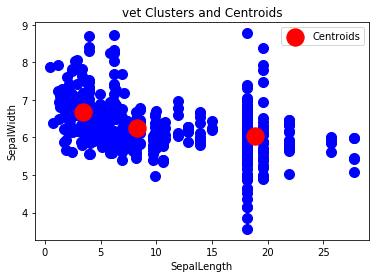

In [11]:
plt.scatter(vet[:, 0], vet[:,1], s = 100, c = 'blue')
plt.scatter(centroides[:,0], centroides[:,1], s = 300, c = 'red',label = 'Centroids')
plt.title('vet Clusters and Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

plt.show()